In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from anndata import AnnData
import scanpy as sc
import json

In [2]:
sc.set_figure_params(dpi=100)

In [3]:
with open('/data/projects/robin/cell_free/proteomics_WGCNA/module_genes.json') as handle: # '/data/projects/robin/cell_free/prot_f/module_genes.json'
    dict_genes = json.loads(handle.read())

In [4]:
module_genes = dict_genes["MEblue"]
print(len(module_genes))

180


In [5]:
df_counts = pd.read_csv("data/allenBrainSmartSeq_counts.csv", index_col=0)
df_tsne = pd.read_csv("data/allenBrainSmartSeq_tsne.csv", index_col=0)
df_meta = pd.read_csv("data/allenBrainSmartSeq_metadata.csv", index_col=0)

In [6]:
df_meta = df_meta.loc[df_tsne.index]

In [7]:
df_counts = df_counts.loc[df_tsne.index]

In [8]:
adata = AnnData(df_counts, obs=df_meta)
adata.obsm["X_tsne"] = df_tsne.to_numpy()

/tmp/ipykernel_49505/2903377541.py:1: FutureWarning: X.dtype being converted to np.float32 from int64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = AnnData(df_counts, obs=df_meta)


In [9]:
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)

In [10]:
sc.pp.highly_variable_genes(adata)

In [11]:
adata.obs["celltype"] = [ct.split(" ")[0] for ct in adata.obs["cluster_label"]]

In [12]:
adata.obs["celltype"].replace({"Oligo": "Oligodendrocyte", "Micro": "Microglia", 
                              "Astro": "Astrocyte", "Exc": "Excitatory neuron",
                              "Inh": "Inhibitory neuron"}, inplace=True)

In [13]:
# adata.write("data/allenBrainSmartSeq.h5ad")

In [14]:
with open('/data/projects/robin/cell_free/prot_f/module_genes.json') as handle:
    dict_genes = json.loads(handle.read())

In [15]:
modules = ["MEblue", "MEbrown", "MEmagenta", "MEroyalblue"]

/opt/conda/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


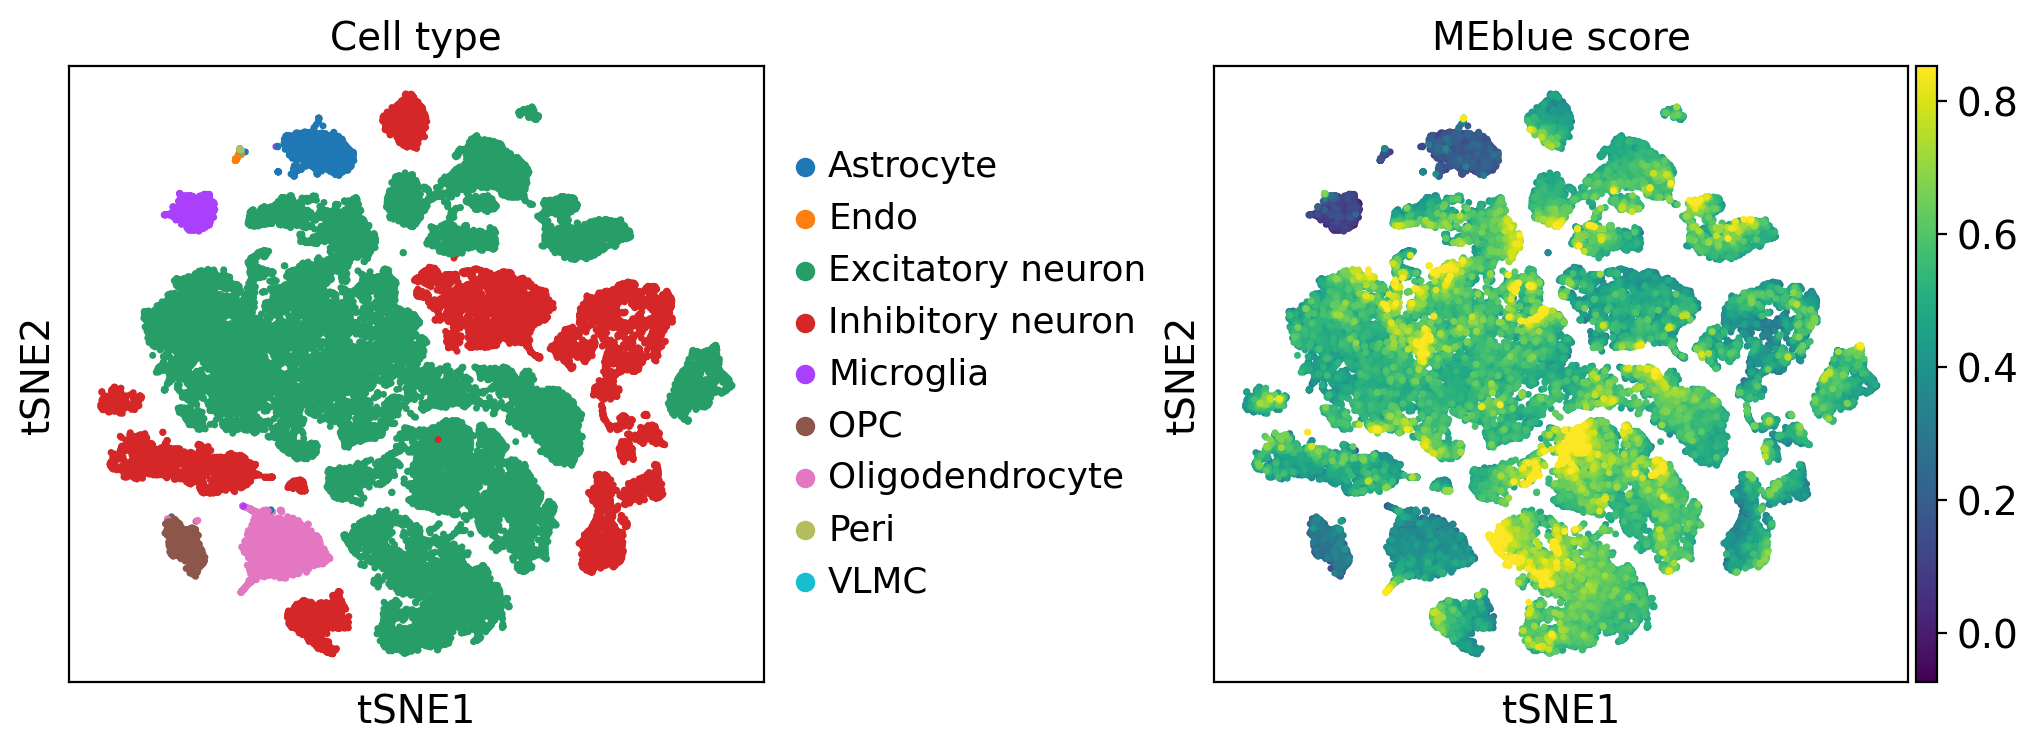

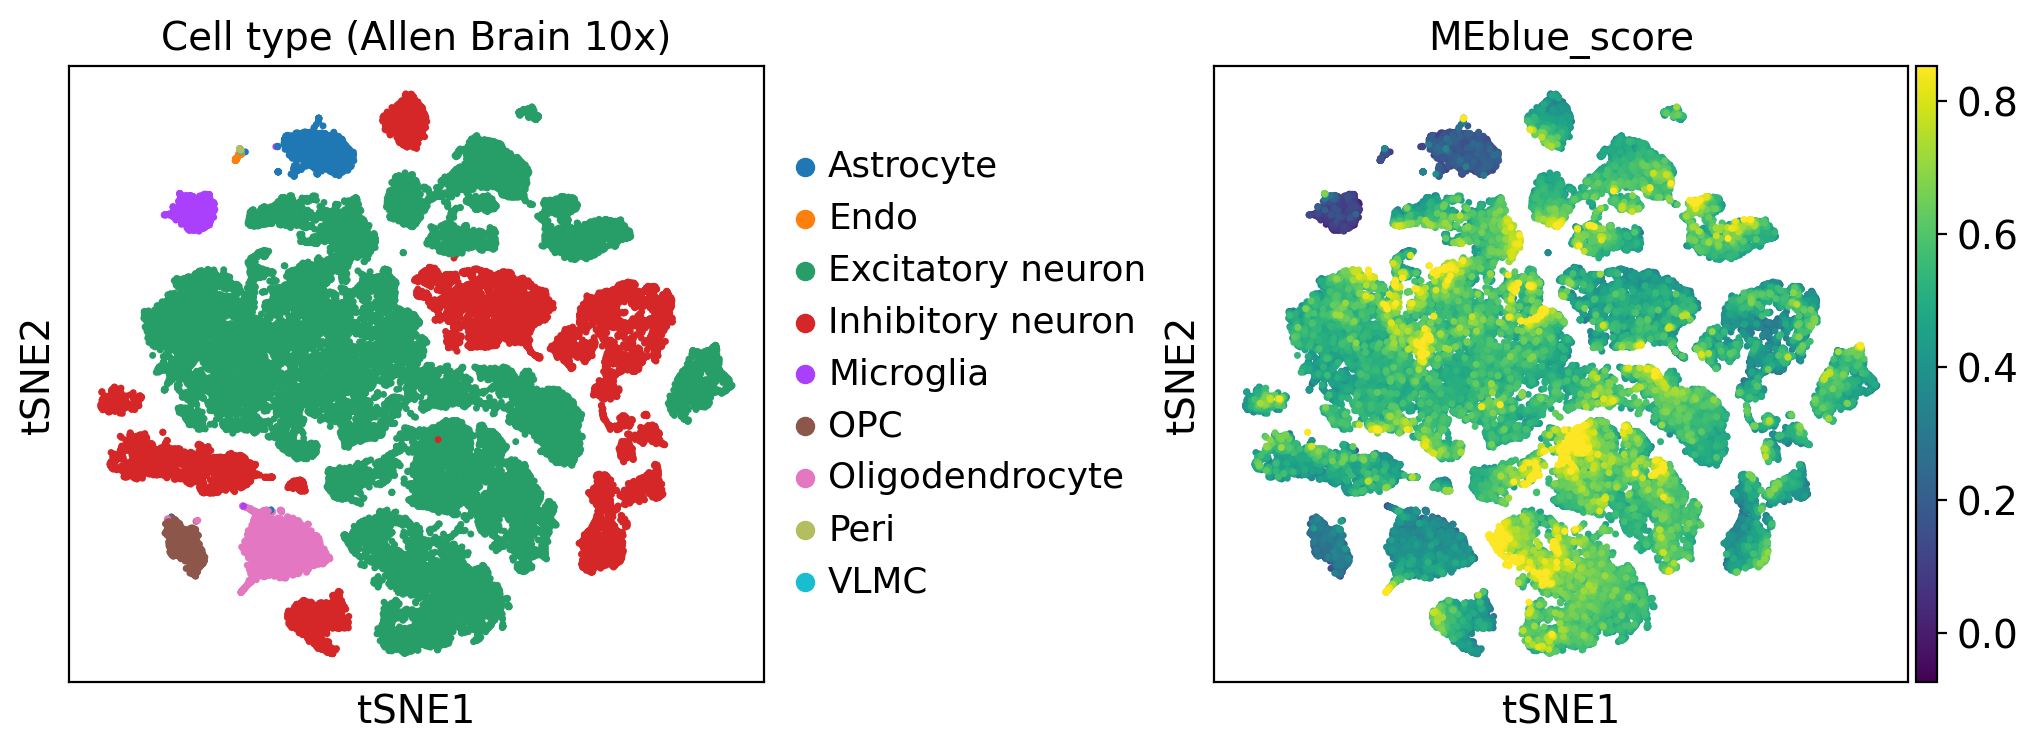

/opt/conda/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


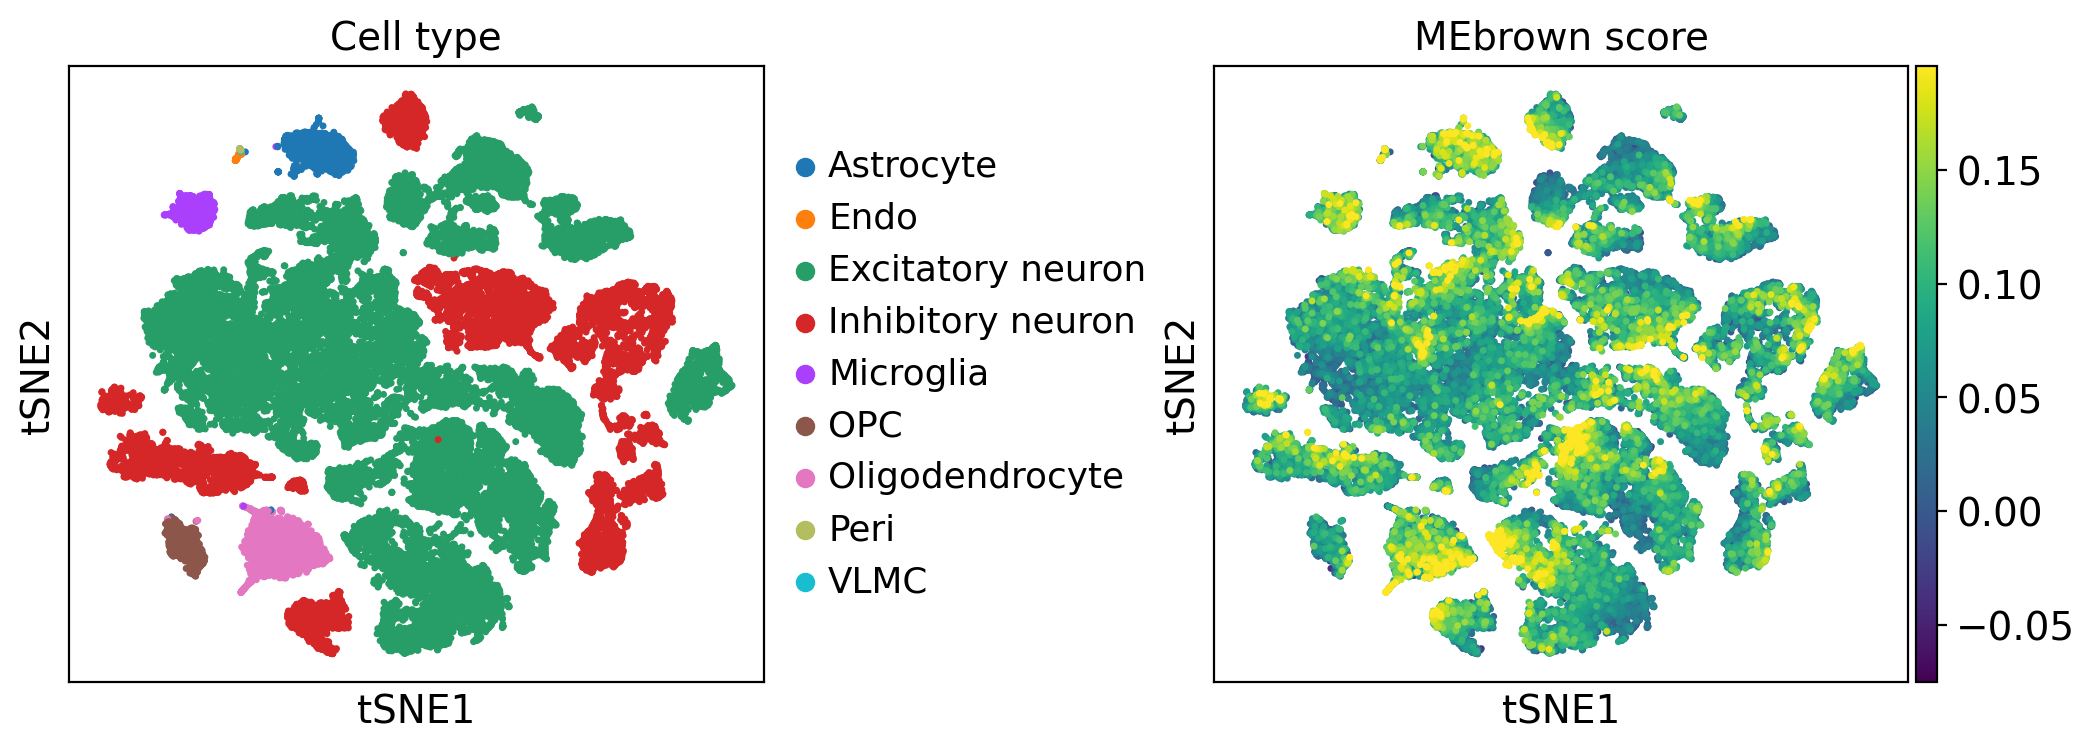

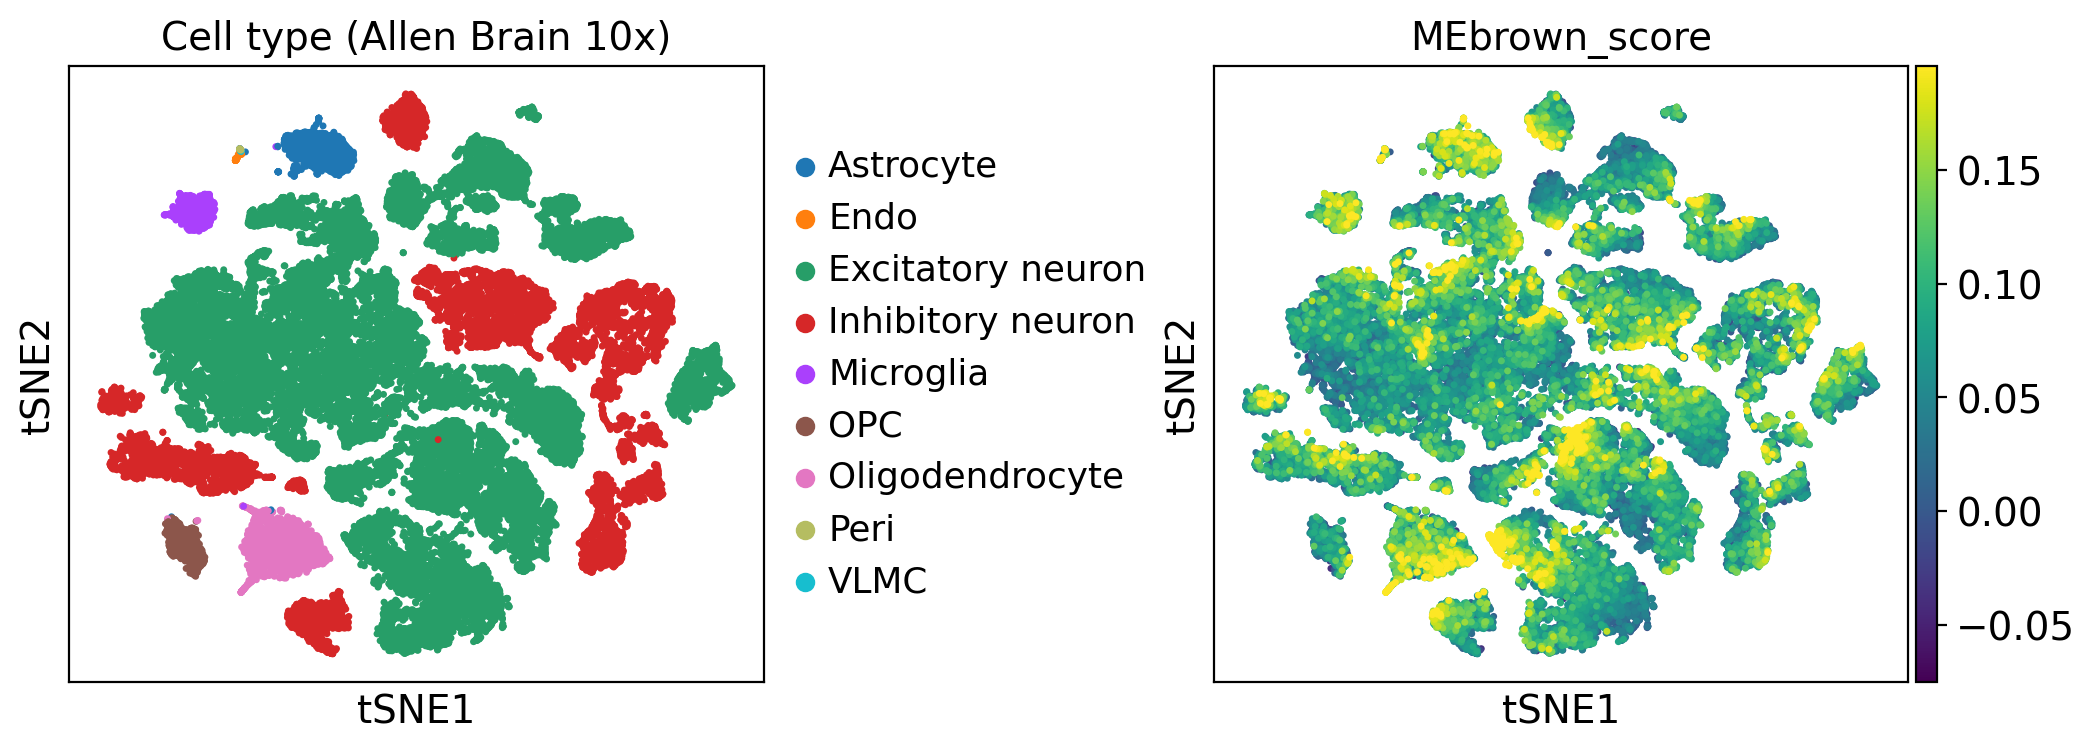

/opt/conda/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


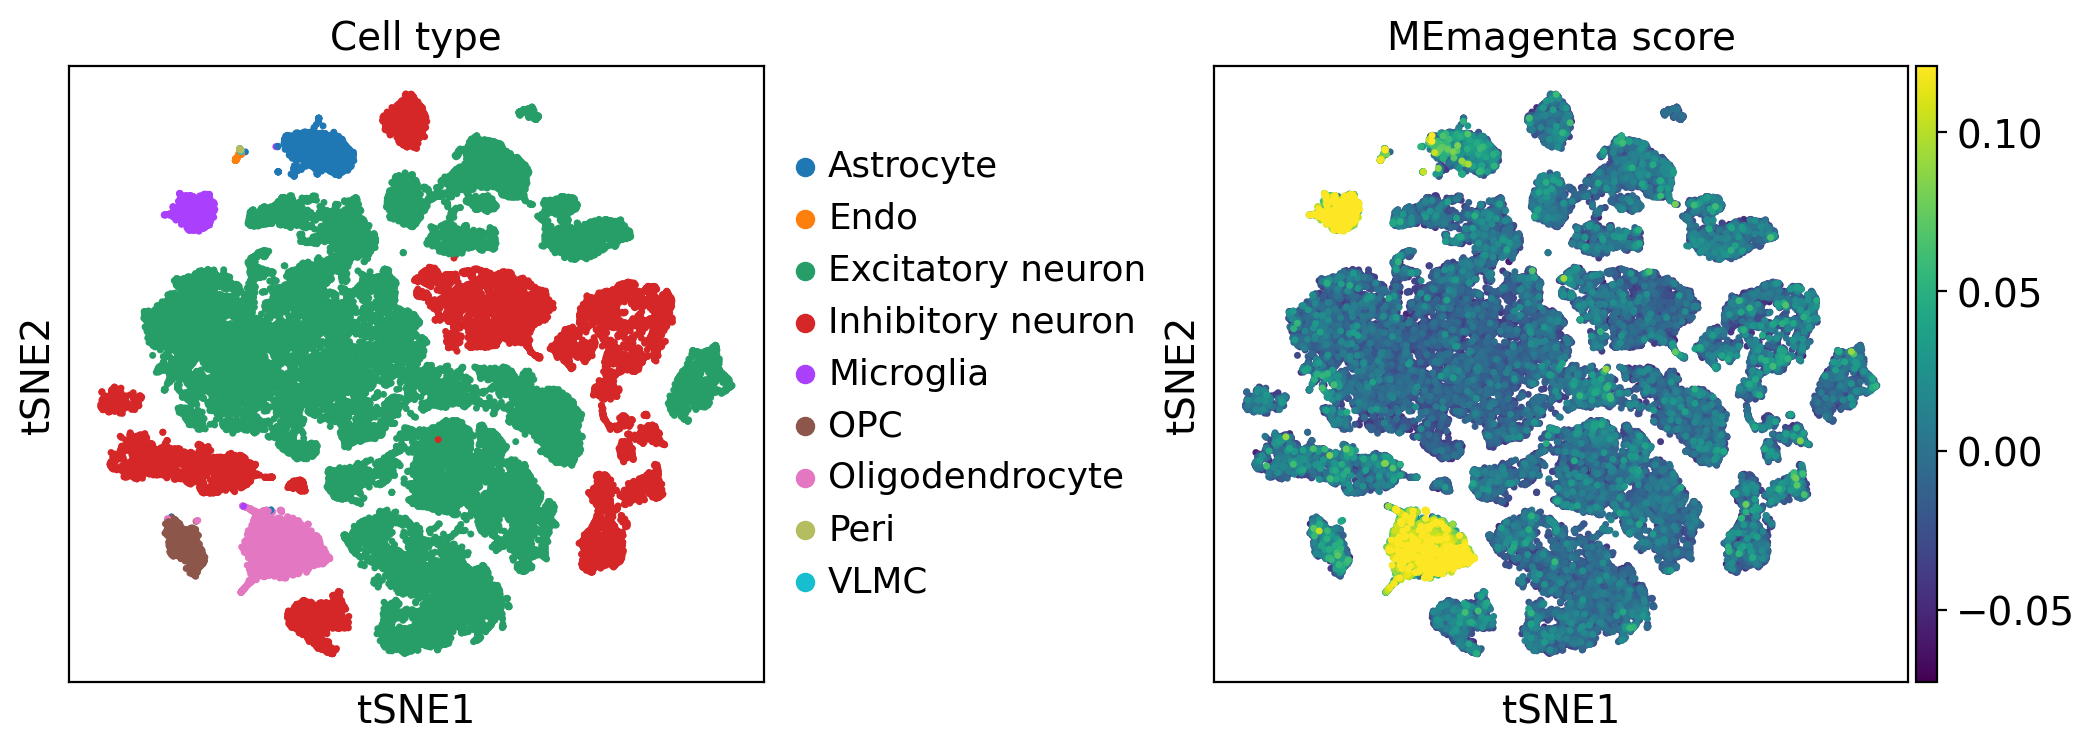

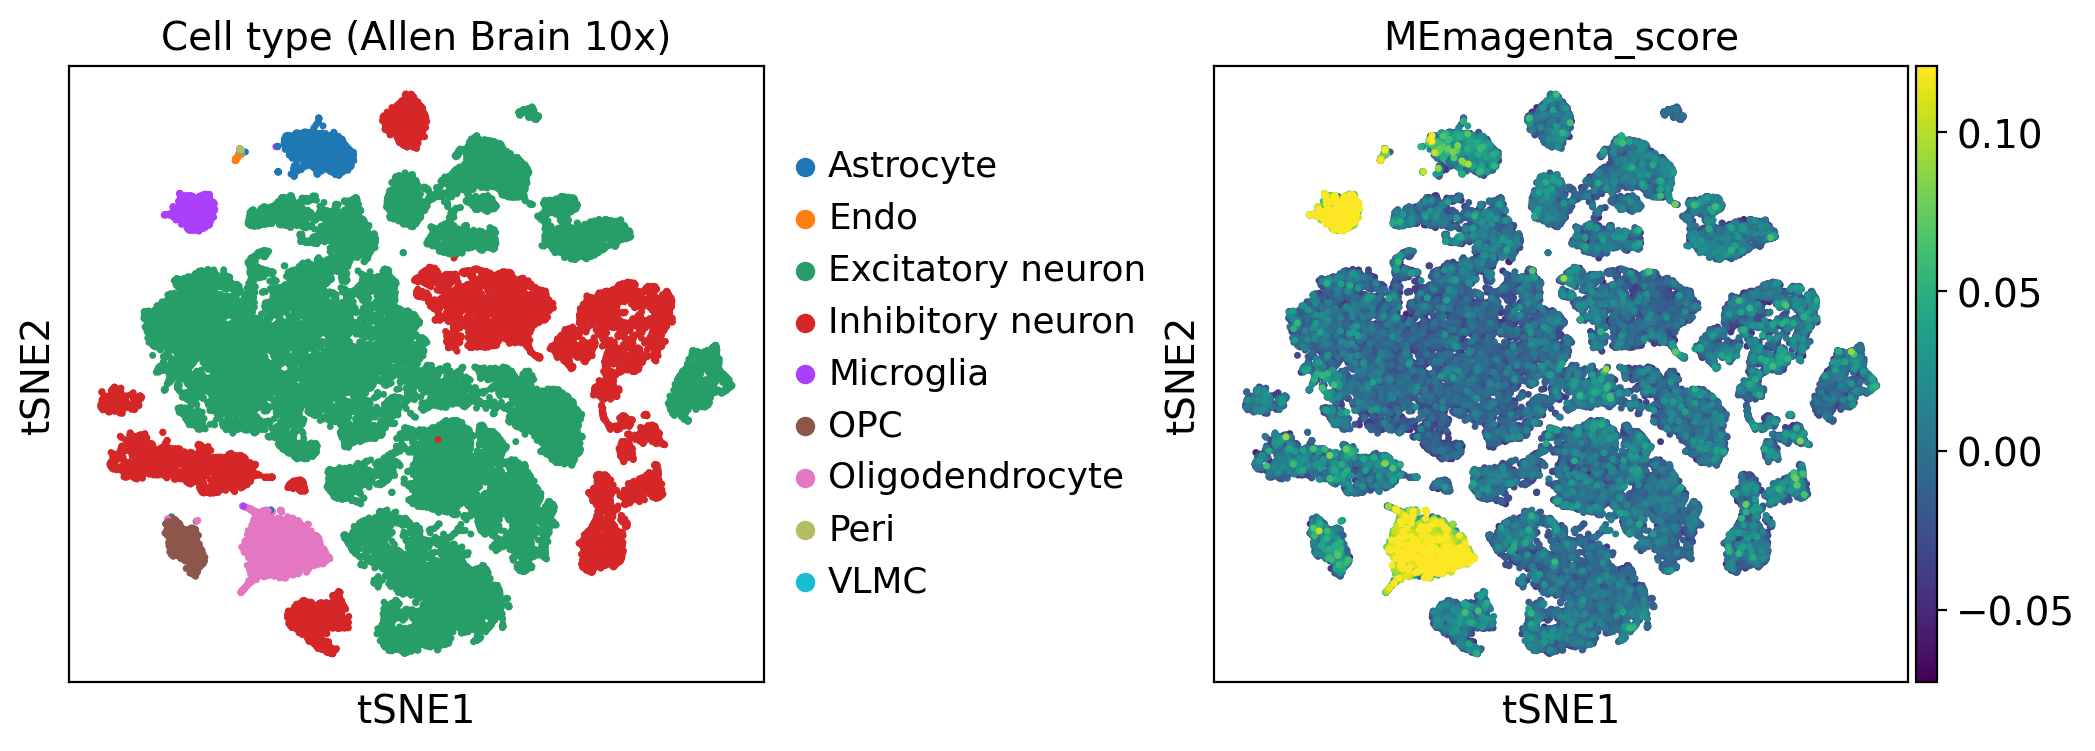

/opt/conda/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


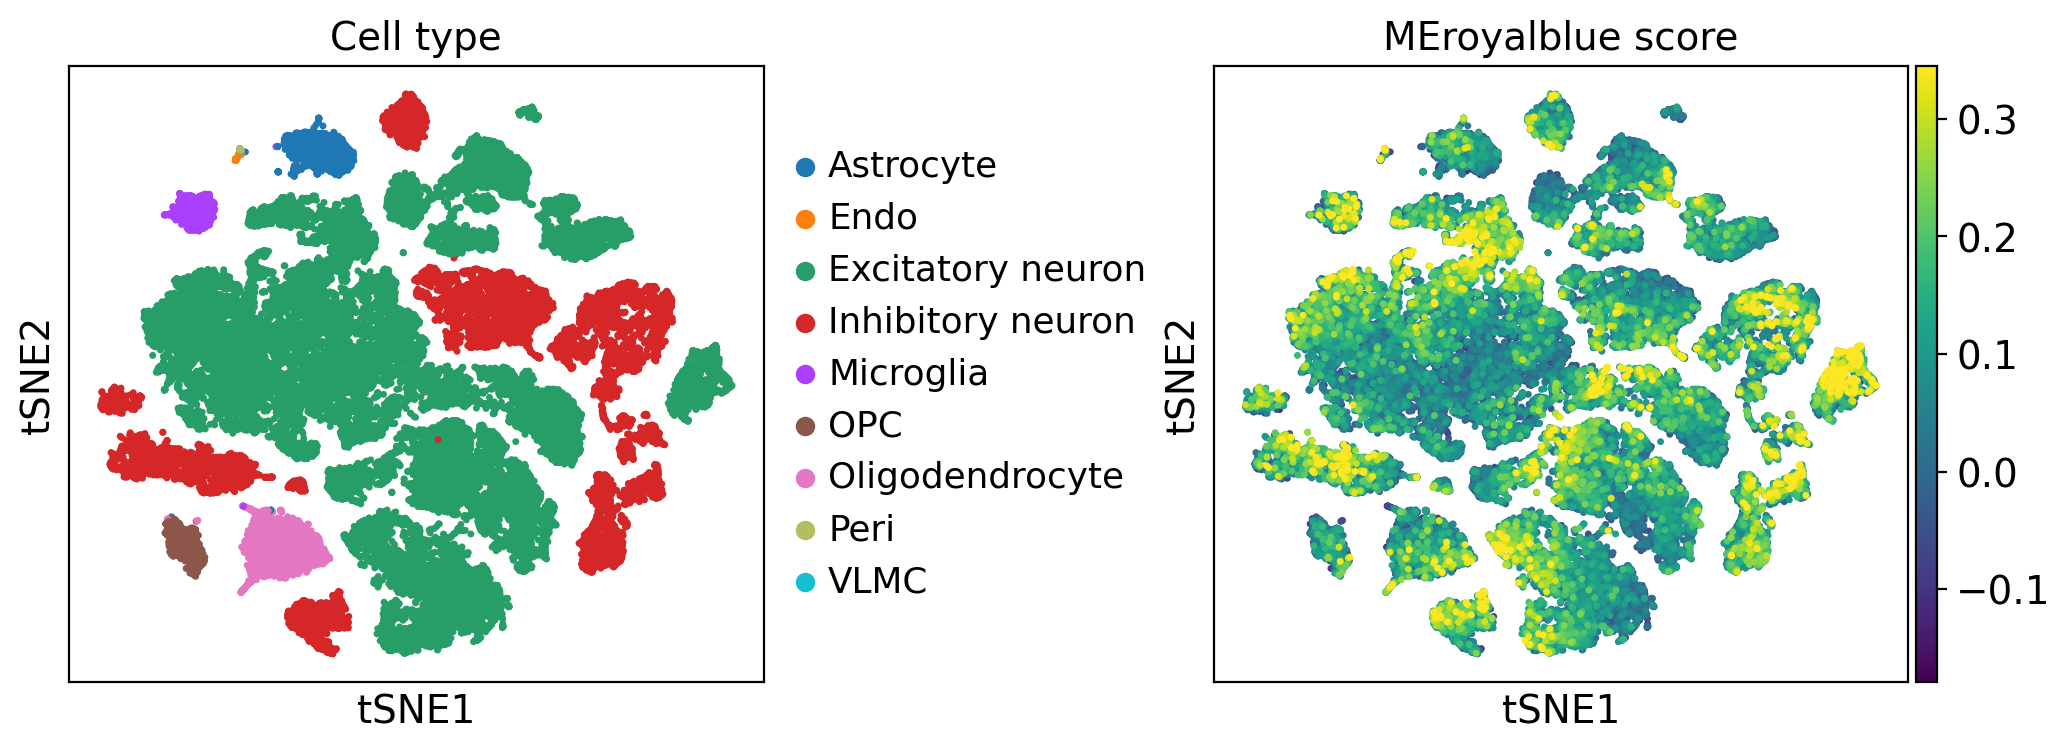

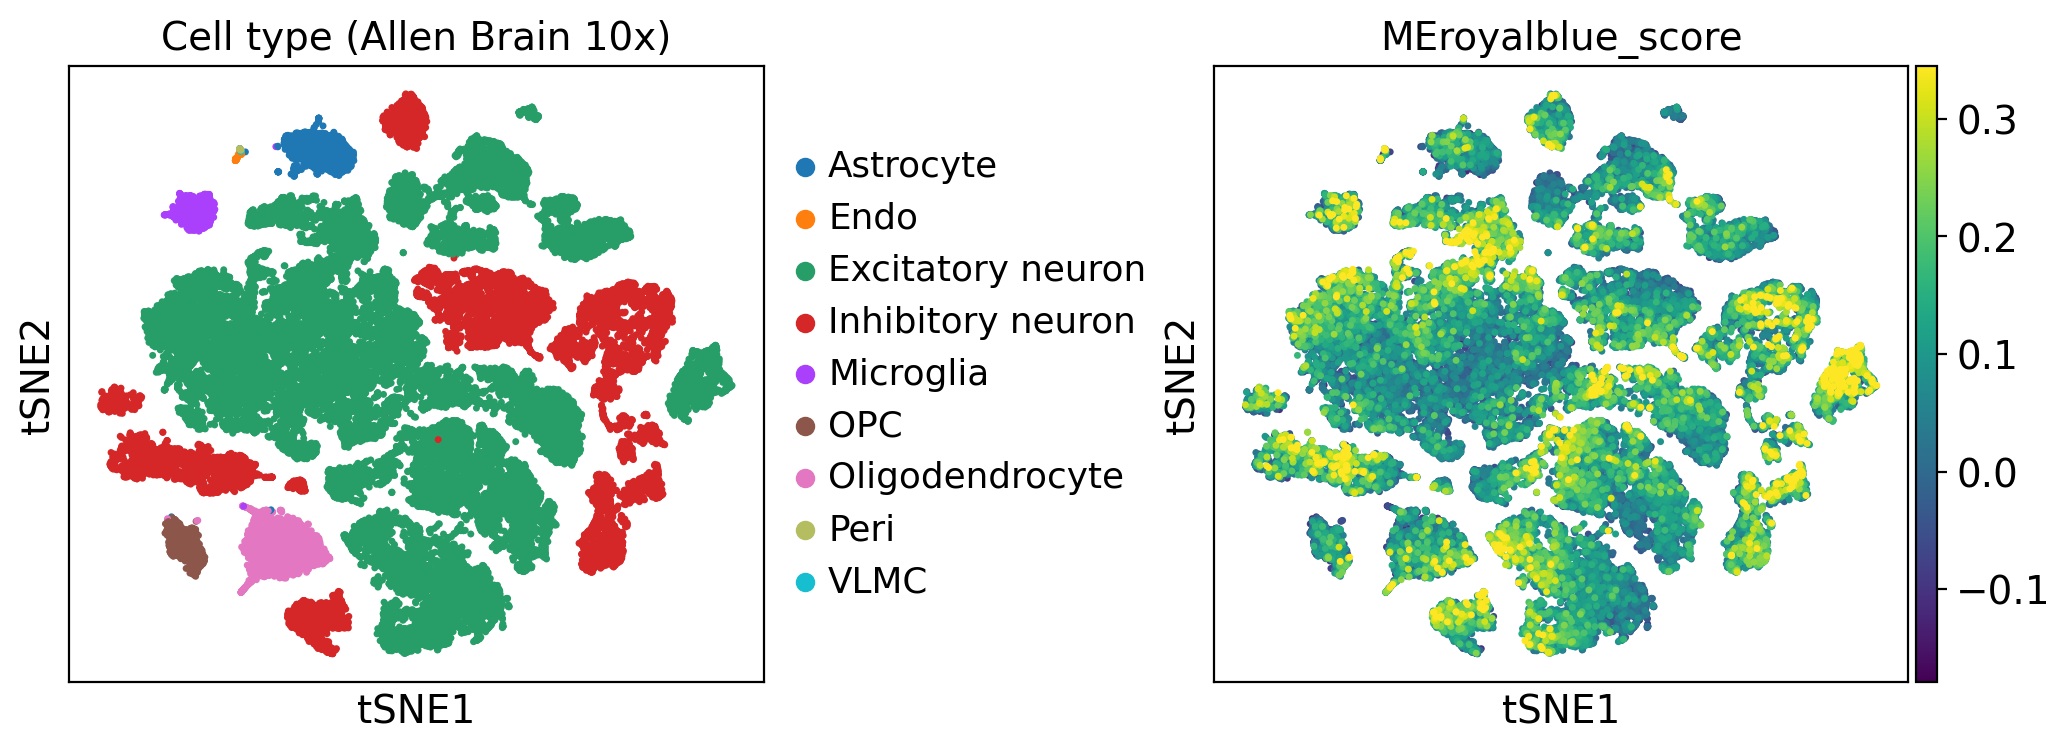

In [16]:
for module in modules:
    module_genes = dict_genes[module]
    sc.tl.score_genes(adata, gene_list=[gene for gene in module_genes if gene in adata.var_names], score_name="{}_score".format(module),
                 use_raw=False)
    sc.pl.tsne(adata, color=["celltype", "{}_score".format(module)], 
           cmap="viridis", 
           ncols=2,
           vmax="p99",
           # legend_loc="on data",
           # legend_fontsize=7, 
           # legend_fontoutline=3, 
           s=25, 
           wspace=0.5,
           title=["Cell type", "{} score".format(module)], 
           save="allenBrain10x_{}.pdf".format(module))
    sc.pl.tsne(adata, color=["celltype", "{}_score".format(module)], 
               cmap="viridis", 
               ncols=2, 
               vmax="p99", 
               # legend_loc="on data",
               # legend_fontsize=7, 
               # legend_fontoutline=3, 
               s=25, 
               wspace=0.5,
               legend_fontweight=2,
               title=["Cell type (Allen Brain 10x)", "{}_score".format(module)],
               save="allenBrain10x_titled_{}.pdf".format(module))